In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import functions

In [2]:
data = loadmat('data/ex5data1.mat')
X, y = data['X'], data['y'][:,0]
Xtest, ytest = data['Xtest'], data['ytest'][:,0]
Xval, yval = data['Xval'], data['yval'][:,0]
m = y.size

Plot training data

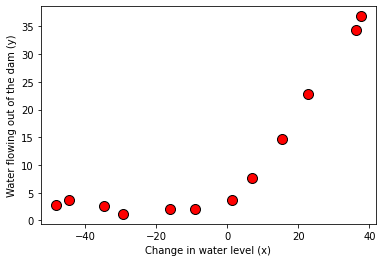

In [3]:
plt.plot(X, y, 'ro', ms=10, mec='k', mew=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)');

In [4]:

theta = np.array([1, 1])
J, _ = functions.linearRegCost(theta, np.concatenate([np.ones((m, 1)), X], axis=1), y, 0)

print('Cost at theta = [1, 1]:\t   %f ' % J)
print('This value should be about 303.993192)\n' % J)

Cost at theta = [1, 1]:	   280.570639 
This value should be about 303.993192)



In [5]:
theta = np.array([1, 1])
J, grad = functions.linearRegCost(theta, np.concatenate([np.ones((m, 1)), X], axis=1), y, 0)

print('Gradient at theta = [1, 1]:  [{:.6f}, {:.6f}] '.format(*grad))
print(' (this value should be about [-15.303016, 598.250744])\n')

Gradient at theta = [1, 1]:  [-14.125861, 552.154533] 
 (this value should be about [-15.303016, 598.250744])



# Train the cost function

In [6]:
Xones = np.concatenate([np.ones((m, 1)), X], axis=1)
res = functions.trainLinReg(Xones, y)

print(res['x'])

[13.08790351  0.36777923]


# plot fit over data

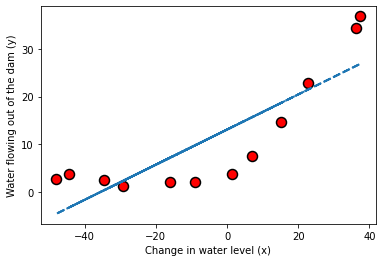

In [7]:
plt.plot(X, y, 'ro', ms=10, mec='k', mew=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, np.dot(Xones, res['x']), '--', lw=2);

# Evaluate

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	195.797410
  	2		0.000000	105.288884
  	3		2.464946	42.964312
  	4		2.274142	46.170324
  	5		10.961707	34.234930
  	6		16.666254	32.292236
  	7		17.586206	30.517759
  	8		16.153652	29.459608
  	9		20.348465	29.720725
  	10		21.146783	27.620925
  	11		22.290812	28.208185
  	12		20.652837	28.095917


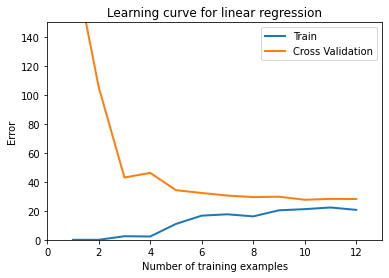

In [8]:
Xones = np.concatenate([np.ones((m, 1)), X], axis=1)
Xval_ones = np.concatenate([np.ones((yval.size, 1)), Xval], axis=1)
error_train, error_val = functions.learningCurve(Xones, y, Xval_ones, yval, lamb=0)

plt.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

# Implemented:
- polyFeature
- featureNormalize

In [9]:

p = 8

# Map X onto Polynomial Features and Normalize
X_poly = functions.polyFeatures(X, p)
X_poly, mu, sigma = functions.featureNormalize(X_poly)
X_poly = np.concatenate([np.ones((m, 1)), X_poly], axis=1)
# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = functions.polyFeatures(Xtest, p)
X_poly_test -= mu.T
X_poly_test /= sigma
X_poly_test = np.concatenate([np.ones((ytest.size, 1)), X_poly_test], axis=1)

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = functions.polyFeatures(Xval, p)
X_poly_val -= mu.T
X_poly_val /= sigma
X_poly_val = np.concatenate([np.ones((yval.size, 1)), X_poly_val], axis=1)

print('Normalized Training Example 1:')
X_poly[0, :]

Normalized Training Example 1:


array([ 1.        , -0.3782437 , -0.78866232,  0.19032872, -0.7375913 ,
        0.32025197, -0.6171516 ,  0.35983501, -0.53109126])

Polynomial Regression (lambda = 1.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	132.535559
  	2		0.028559	136.977818
  	3		1.886385	5.489206
  	4		1.029441	6.574403
  	5		0.857392	6.575323
  	6		0.684587	8.179136
  	7		1.234186	5.606077
  	8		1.170031	5.316030
  	9		1.418183	6.018826
  	10		1.520800	6.789988
  	11		1.239811	5.997231
  	12		2.121499	5.142714


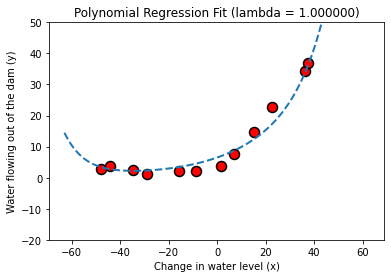

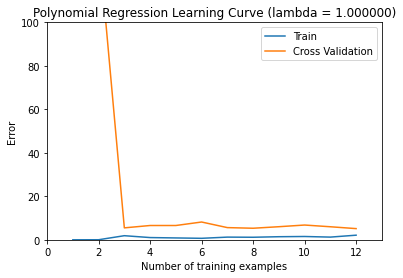

In [10]:
lamb = 1
p=8
theta = functions.trainLinReg(X_poly, y,
                             lamb=lamb, opts= {'maxiter':55})

# Plot training data and fit
plt.plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

functions.plotFit(np.min(X), np.max(X), mu, sigma, theta['x'], p)

plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = %f)' % lamb)
plt.ylim([-20, 50])

plt.figure()
error_train, error_val = functions.learningCurve(X_poly, y, X_poly_val, yval, lamb)
plt.plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

plt.title('Polynomial Regression Learning Curve (lambda = %f)' % lamb)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(['Train', 'Cross Validation'])

print('Polynomial Regression (lambda = %f)\n' % lamb)
print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

# plotting for 4 values of lambda 

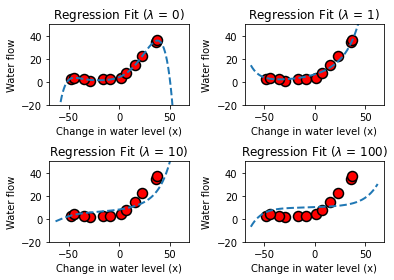

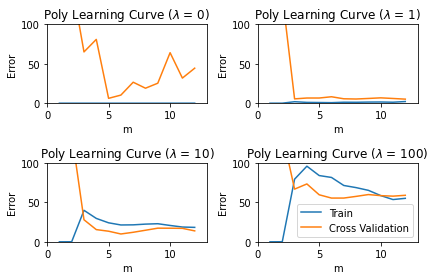

In [11]:
lamb_vec = [0, 1, 10, 100]
fig, axs = plt.subplots(2, 2)
fig2, val_axs = plt.subplots(2,2)
for idx, lam in enumerate(lamb_vec):
    i = int(idx/2)
    j = idx%2

    theta = functions.trainLinReg(X_poly, y,
                             lamb=lam, opts= {'maxiter':55})

    # Plot training data and fit
    axs[i,j].plot(X, y, 'ro', ms=10, mew=1.5, mec='k')

    functions.plotFit_ax(np.min(X), np.max(X), mu, sigma, theta['x'], p, axs[i,j])

    axs[i,j].set_xlabel('Change in water level (x)')
    axs[i,j].set_ylabel('Water flow')
    axs[i,j].set_title('Regression Fit ($\lambda$ = {:.0f})'.format(lam))
    axs[i,j].set_ylim([-20, 50])
    plt.tight_layout()

    error_train, error_val = functions.learningCurve(X_poly, y, X_poly_val, yval, lam)
    val_axs[i,j].plot(np.arange(1, 1+m), error_train, np.arange(1, 1+m), error_val)

    val_axs[i,j].set_title('Poly Learning Curve ($\lambda$ = {:.0f})'.format(lam))
    val_axs[i,j].set_xlabel('m')
    val_axs[i,j].set_ylabel('Error')
    val_axs[i,j].set(xlim=(0, 13), ylim=(0, 100))
    # plt.axis([0, 13, 0, 100])
    plt.legend(['Train', 'Cross Validation'])
    plt.tight_layout()
fig.subplots_adjust(hspace=0.7, wspace = 0.4)

# Now do diagnostic curve for lambda

lambda		Train Error	Validation Error
 0.000000	0.028987	44.426909
 0.010000	0.237044	13.815059
 0.020000	0.265960	11.553632
 0.040000	0.303607	9.904835
 0.080000	0.395023	7.702167
 0.160000	0.547559	5.772847
 0.320000	0.846191	4.434374
 0.640000	1.347530	4.064970
 1.280000	2.379429	4.925661
 2.560000	3.684393	3.715921
 5.120000	7.013657	4.158443
 10.240000	18.595616	14.131214


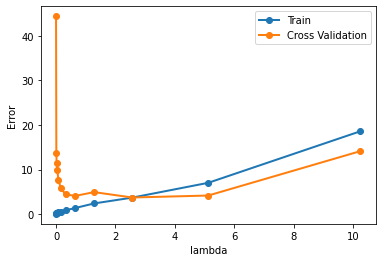

In [12]:
lambda_vec, error_train, error_val = functions.validationCurve(X_poly, y, X_poly_val, yval)

plt.plot(lambda_vec, error_train, '-o', lambda_vec, error_val, '-o', lw=2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

print('lambda\t\tTrain Error\tValidation Error')
for i in range(len(lambda_vec)):
    print(' %f\t%f\t%f' % (lambda_vec[i], error_train[i], error_val[i]))


# OPTIONAL: get error with test data

In [13]:
p = 8
theta = functions.trainLinReg(X_poly, y,
                             lamb=3, opts= {'maxiter':155})

test_error = functions.linearRegCost(theta['x'], X_poly_test, ytest, 0)
print(test_error[0])

3.4042487331454567
